In [18]:
# BAN6800 Module 4 Assignment: Customer Churn Prediction Model for T-Mobile USA
# Name: Onimisi David Adidi
# Learner ID: 149525

# Step 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'C:\\Users\\DELL\\Python\\.venv\\cleaned_customer_data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
data.info()
print("\nDataset Description:")
print(data.describe())

Dataset Head:
   CustomerID  Count_x        Country       State         City  Zip Code  \
0  3668-QPYBK        1  United States  California  Los Angeles     90003   
1  9237-HQITU        1  United States  California  Los Angeles     90005   
2  9305-CDSKC        1  United States  California  Los Angeles     90006   
3  7892-POOKP        1  United States  California  Los Angeles     90010   
4  0280-XJGEX        1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude Gender_x  ...  CLTV  \
0  33.964131, -118.272783  33.964131 -118.272783     Male  ...  3239   
1   34.059281, -118.30742  34.059281 -118.307420   Female  ...  2701   
2  34.048013, -118.293953  34.048013 -118.293953   Female  ...  5372   
3  34.062125, -118.315709  34.062125 -118.315709   Female  ...  5003   
4  34.039224, -118.266293  34.039224 -118.266293     Male  ...  5340   

                    Churn Reason Count_y  Gender_y Age Under 30  \
0   Competitor made better of

In [8]:
# Step 2: Define Target and Features
target = 'Churn Value'
features = data.drop(columns=[target]).columns

X = data[features]
y = data[target]

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# View counts of training and testing datasets
y_train.value_counts()
y_test.value_counts()

0    1525
1     588
Name: Churn Value, dtype: int64

In [11]:
# If you look at this data, the total churned customers is roughly 28% - 
# which means already 28% of a class total whose prediction would be on interest(churned) is not in the data while 72% of the data does not include any churning. 
# This is a problem = we have a class imbalance and our prediction is already biased even before we develop the predictio model.

# This can be corrected using SMOTE
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.3.2
!pip install imblearn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Obtaining dependency information for scikit-learn==1.3.2 from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl (9.2 MB)
  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [14]:
from imblearn.over_sampling import SMOTE

smote=SMOTE()
X_smote, y_smote=smote.fit_resample(X_train,y_train)
X_train, y_train = X_smote, y_smote

# Scale the features
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Step 3: Model Development
# Logistic Regression Model with scaled data
logistic_model = LogisticRegression(solver='liblinear', max_iter=2000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Step 4: Model Evaluation
# Logistic Regression Evaluation
logistic_preds = logistic_model.predict(X_test_scaled)
logistic_probs = logistic_model.predict_proba(X_test_scaled)[:, 1]
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_preds))
print("Logistic Regression AUC-ROC Score:", roc_auc_score(y_test, logistic_probs))

# Random Forest Evaluation
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print("Random Forest AUC-ROC Score:", roc_auc_score(y_test, rf_probs))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1525
           1       0.80      0.98      0.88       588

    accuracy                           0.93      2113
   macro avg       0.90      0.94      0.92      2113
weighted avg       0.94      0.93      0.93      2113

Logistic Regression AUC-ROC Score: 0.9911341585814654

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1525
           1       0.99      0.97      0.98       588

    accuracy                           0.99      2113
   macro avg       0.99      0.98      0.99      2113
weighted avg       0.99      0.99      0.99      2113

Random Forest AUC-ROC Score: 0.9992020742723319


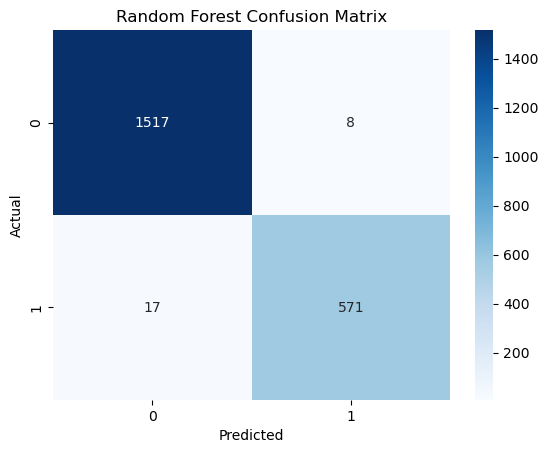

In [17]:
# Step 5: Visualization
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, rf_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()